In [14]:
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

df = pd.read_csv('labels.csv')
df['id'] = df['id'] + '.jpg'

df_train, df_test = train_test_split(df)

train_gen = ImageDataGenerator(rescale=1/255.0).flow_from_dataframe(
    df_train, directory='train', x_col='id', y_col='breed'
)

test_gen = ImageDataGenerator(rescale=1/255.0).flow_from_dataframe(
    df_test, directory='train', x_col='id', y_col='breed'
)

labels = list(train_gen.class_indices.keys())


Found 7666 validated image filenames belonging to 120 classes.
Found 2556 validated image filenames belonging to 120 classes.


In [16]:
from tensorflow.keras.applications import MobileNetV2

base = MobileNetV2(weights='imagenet', include_top=False)
base.trainable = False

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
out = Dense(120, activation='softmax')(x)

model = Model(inputs=base.input, outputs=out)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
result = model.fit(train_gen, epochs=7, validation_data=test_gen)


/var/folders/m_/t9bvchbn17s8wyq474l6jjjr0000gn/T/ipykernel_86930/2129537480.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = MobileNetV2(weights='imagenet', include_top=False)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
240/240 ━━━━━━━━━━━━━━━━━━━━ 132s 542ms/step - accuracy: 0.3021 - loss: 3.2961 - val_accuracy: 0.6854 - val_loss: 1.1033
Epoch 2/7
240/240 ━━━━━━━━━━━━━━━━━━━━ 137s 569ms/step - accuracy: 0.7685 - loss: 0.8062 - val_accuracy: 0.7105 - val_loss: 0.9514
Epoch 3/7
240/240 ━━━━━━━━━━━━━━━━━━━━ 136s 568ms/step - accuracy: 0.8483 - loss: 0.5059 - val_accuracy: 0.7289 - val_loss: 0.8821
Epoch 4/7
240/240 ━━━━━━━━━━━━━━━━━━━━ 131s 544ms/step - accuracy: 0.8974 - loss: 0.3557 - val_accuracy: 0.7406 - val_loss: 0.8485
Epoch 5/7
240/240 ━━━━━━━━━━━━━━━━━━━━ 139s 580ms/step - accuracy: 0.9329 - loss: 0.2531 - val_accuracy: 0.7375 - val_loss: 0.9166
Epoch 6/7
240/240 ━━━━━━━━━━━━━━━━━━━━ 155s 648ms/step - accuracy: 0.9566 - loss: 0.1890 - val_accuracy: 0.7387 - val_loss: 0.8850
Epoch 7/7
240/240 ━━━━━━━━━━━━━━━━━━━━ 164s 685ms/step - accuracy: 0.9783 - loss: 0.1327 - val_accuracy: 0.7477 - val_loss: 0.8837


In [18]:
from sklearn.metrics import classification_report
import numpy as np 

y_true = test_gen.classes
y_pred = np.argmax(model.predict(test_gen), axis=1)
print(classification_report(y_true, y_pred))

80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 334ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.03      0.03      0.03        33
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        26
          10       0.05      0.05      0.05        21
          11       0.03      0.03      0.03        31
          12       0.05      0.05      0.05        19
          13       0.00      0.00      0.00        29
          14       0.05      0.05      0.05        21
          15       0.00      0.00      0.00        24
          16       0.00      0.00      

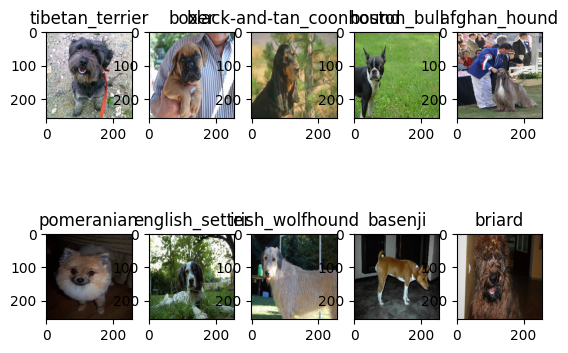

In [25]:
import matplotlib.pyplot as plt

x, y = next(test_gen)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x[i])
    plt.title(labels[np.argmax(y[i])])
plt.ti